In [1]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib
import math

from ipywidgets import interact, widgets, fixed

Problem 1

In [15]:
#Global Variables
G = 6.6742*10**(-11)
M2 = 1.989*10**30
M1 = 1.899*10**27
R = 778.3*10**9
Tj = 3.743*10**8
O = np.sqrt(G*(M1+M2)/R**3)
m = 1

def initpos(alpha):
    return r * np.array([(M2-M1)/(M1+M2) * np.cos(alpha), np.sin(alpha), 0])

def derf(func, t, h):
    return (func(t+h)-func(t)) / (h)


def RK4(func, h, *kwargs):
    O = 1.678818231477739e-08
    #O = 1
    
    ti = -4*np.pi/O
    tf = 4*np.pi/O
    t_list = np.linspace(ti, tf, num=(tf-ti)/h);
    
    if len(kwargs) > 0:
        tmp = np.array(kwargs)
    else:
        tmp = np.array([0,0,0])
    
    r0 = tmp
    xout = []
    yout = []
    for t in t_list:
        rk1 = h * func(t, h)
        rk2 = h * (func(t+h/2, h) + rk1/2)
        rk3 = h * (func(t+h/2, h) + rk2/2)
        rk4 = h * (func(t+h, h) + rk3)
        rout = r0 + (1/6)*(rk1 + 2*rk2 + 2*rk3 + rk4)
        r0 = rout
            
        xout.append(rout[0])
        yout.append(rout[1])
    return (t_list, xout, yout)

def vel(t, h):
    v0 = derf(initpos, t, h)
    vx = v0[0]
    vy = v0[1]
    vel = 2*O*np.array([vy, -vx, 0])
    return vel

def F1(t, h):
    alpha = np.pi/3
    v = vel(t, h)
    r = initpos(alpha)
    cent = O**2 * r
    r1 = np.array([M2*R/(M1+M2),0,0])
    r2 = np.array([-M1*R/(M1+M2),0,0])
    
    tmpfunc = -G*M1*(r-r1)/(np.abs((r-r1)**3)) -G*M2*(r-r2)/(np.abs(r-r2)**3) + v - cent
    tmpfunc2 = []
    for i in tmpfunc:
        if np.isnan(i):
            tmpfunc2.append(0)
        else:
            tmpfunc2.append(i)
    func = np.array(tmpfunc2)
    return func

def F2(t, h):
    alpha = np.pi/2
    v = vel(t, h)
    r = initpos(alpha)
    cent = O**2 * r
    r1 = np.array([M2*R/(M1+M2),0,0])
    r2 = np.array([-M1*R/(M1+M2),0,0])
    
    tmpfunc = -G*M1*(r-r1)/(np.abs((r-r1)**3)) -G*M2*(r-r2)/(np.abs(r-r2)**3) + v - cent
    tmpfunc2 = []
    for i in tmpfunc:
        if np.isnan(i):
            tmpfunc2.append(0)
        else:
            tmpfunc2.append(i)
    func = np.array(tmpfunc2)
    return func

In [52]:
tl1, x1, y1 = RK4(F1, 750000)
tl2, x2, y2 = RK4(F2, 750000)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in true_divide
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:77: RuntimeWarning: invalid value encountered in true_divide


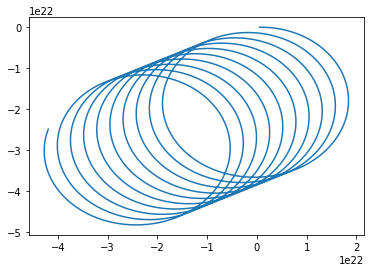

In [55]:
#Alpha = np.pi/3, corresponds to L5, expect circular oscillations
plt.plot(x1,y1)

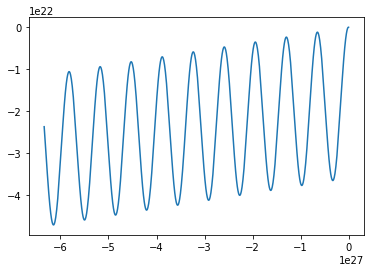

In [56]:
#Alpha = np.pi/2, unstable, expect wandering over the plane
plt.plot(x2,y2)

Problem 2

In [37]:
def FF(m, r):
    #G = 6.6742*10**(-11)
    G = 1
    if r == 0 or r < .00001:
        return 0
    else:
        return -G * m / (r**2)

def ForceList(thlist, rlist):
    m = 1; #arbitrary for now
    xlist = []
    ylist = []

    for i, r1 in enumerate(rlist):
        xtmp = 0
        ytmp = 0
        
        #tmp_i = rlist[i+1:]
        #for j, e2 in enumerate(tmp_i):
        for j, r2 in enumerate(rlist):
            rdif = np.sqrt(r1**2 + r2**2 - 2*r1*r2*np.cos(thlist[i]-thlist[j]))
            #print(rdif)
            ry1 = r1*np.sin(thlist[i])
            ry2 = r2*np.sin(thlist[j])
            
            rx1 = r1*np.cos(thlist[i])
            rx2 = r2*np.cos(thlist[j])
            
            ydif = ry2-ry1
            xdif = rx2-rx1
            if rdif == 0:
                theta = 0;
            else:
                theta = np.arctan(np.abs(ydif/xdif)) #relative theta between points
            #print(theta)
            xf, yf = FF(m, rdif)*np.array([np.cos(theta), np.sin(theta)])
            #print(xf, yf)
            xtmp += xf * np.sign(xdif)
            ytmp += yf * np.sign(ydif)
        xlist.append(xtmp)
        ylist.append(ytmp)
    return xlist, ylist

def initpos2(alpha):
    M1 = m
    M2 = m
    return np.array([(M2-M1)/(M1+M2) * np.cos(alpha), np.sin(alpha), 0])

def Int(thlist, rlist, h):
    ax0, ay0 = np.array(ForceList(thlist, rlist))
    #timescale
    r = 1
    g = 1
    m = 1
    sz = len(rlist)
    
    tdyn = np.sqrt(r**3 /(g * m))
    torb = 4*np.pi**tdyn
    t_list = np.linspace(0, torb, num=torb/h);
    
    sz = len(rlist)
    #vx0 = np.random.rand(sz) * np.random.choice((-1,1))
    #vy0 = np.random.rand(sz) * np.random.choice((-1,1))
    vx0 = np.array([0,0,0 ])
    vy0 = np.array([0,0,0 ])
    x0, y0, z0 = initpos2(thlist)
    
    #x0 = np.array(sz*[0,])
    #y0 = np.array(sz*[0,])
    #vx0 = np.array(sz*[0,])
    #vy0 = np.array(sz*[0,])
    
    xout = []
    yout = []
    vxout = []
    vyout = []
    for t in t_list:
        vx1 = vx0 + h*ax0
        vy1 = vy0 + h*ay0
        x1 = x0 + h*vx0
        y1 = y0 + h*vy0
        
        xout.append(x1)
        yout.append(y1)
        vxout.append(vx1)
        vyout.append(vy1)
        
        vx0=vx1
        vy0=vy1
        x0=x1
        y0=y1
    return t_list, xout, yout, vxout, vyout

def maxcheck(x):
    lim = 0
    for i in x:
        tmp1 = max(x)
        tmp2 = np.abs(min(x))
        tmp3 = 0
        if tmp1 > tmp2:
            tmp3 = tmp1
        else:
            tmp3 = tmp2
        if tmp3 > lim:
            lim = tmp3
    return lim

def lim(x):
    lim = maxcheck(x[-1])
    return math.ceil(lim*1.2)

def IntPlot(t, x, y, limx, limy):
    plt.plot(x[t], y[t], 'ro')
    plt.xlim(-limx, limx)
    plt.ylim(-limy, limy)
    return (x[t], y[t])

In [38]:
#Setting up triangle
thl1 = [0, 2*np.pi/3, 4*np.pi/3]
rl1 = [1, 1, 1]

tl1, x1, y1, vx1, vy1 = Int(thl1, rl1, .001)
limx = lim(x1)
limy = lim(y1)
interact(IntPlot, x = fixed(x1), y=fixed(y1), limx=fixed(limx), limy=fixed(limy), t=widgets.IntSlider(min=0, max=len(x1)-1, step=1, value= 300));

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:59: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.


interactive(children=(IntSlider(value=300, description='t', max=12565), Output()), _dom_classes=('widget-inter…

In [39]:
limx = lim(vx1)
limy = lim(vy1)
interact(IntPlot, x = fixed(vx1), y=fixed(vy1), limx=fixed(limx), limy=fixed(limy), t=widgets.IntSlider(min=0, max=len(vx1)-1, step=1, value= 300));

interactive(children=(IntSlider(value=300, description='t', max=12565), Output()), _dom_classes=('widget-inter…

Problem 3

In [35]:
def FF(m, r):
    #G = 6.6742*10**(-11)
    G = 1
    if r == 0 or r < .00001:
        return 0
    else:
        return G * m / (r**2)

def ForceList(thlist, rlist):
    m = 1; #arbitrary for now
    xlist = []
    ylist = []

    for i, r1 in enumerate(rlist):
        xtmp = 0
        ytmp = 0
        
        #tmp_i = rlist[i+1:]
        #for j, e2 in enumerate(tmp_i):
        for j, r2 in enumerate(rlist):
            rdif = np.sqrt(r1**2 + r2**2 - 2*r1*r2*np.cos(thlist[i]-thlist[j]))
            #print(rdif)
            ry1 = r1*np.sin(thlist[i])
            ry2 = r2*np.sin(thlist[j])
            
            rx1 = r1*np.cos(thlist[i])
            rx2 = r2*np.cos(thlist[j])
            
            ydif = ry2-ry1
            xdif = rx2-rx1
            if rdif == 0:
                theta = 0;
            else:
                theta = np.arctan(np.abs(ydif/xdif)) #relative theta between points
            #print(theta)
            xf, yf = FF(m, rdif)*np.array([np.cos(theta), np.sin(theta)])
            #print(xf, yf)
            xtmp += xf * np.sign(xdif)
            ytmp += yf * np.sign(ydif)
        xlist.append(xtmp)
        ylist.append(ytmp)
    return xlist, ylist

def Int2(thlist, rlist, h):
    ax0, ay0 = np.array(ForceList(thlist, rlist))
    #timescale
    r = 1
    g = 1
    m = 1
    sz = len(rlist)
    
    tdyn = np.sqrt(r**3 /(g * m))
    torb = 4*np.pi**tdyn
    t_list = np.linspace(0, torb, num=torb/h);
    
    sz = len(rlist)
    #vx0 = np.random.rand(sz) * np.random.choice((-1,1))
    #vy0 = np.random.rand(sz) * np.random.choice((-1,1))
    vx0 = np.array([-.93240737,.93240737/2,.93240737/2 ])
    vy0 = np.array([-.86473146,.86473146/2,.86473146/2 ])
    x0, y0, z0 = initpos2(thlist)
    
    #x0 = np.array(sz*[0,])
    #y0 = np.array(sz*[0,])
    #vx0 = np.array(sz*[0,])
    #vy0 = np.array(sz*[0,])
    
    xout = []
    yout = []
    vxout = []
    vyout = []
    for t in t_list:
        vx1 = vx0 + h*ax0
        vy1 = vy0 + h*ay0
        x1 = x0 + h*vx0
        y1 = y0 + h*vy0
        
        xout.append(x1)
        yout.append(y1)
        vxout.append(vx1)
        vyout.append(vy1)
        
        vx0=vx1
        vy0=vy1
        x0=x1
        y0=y1
    return t_list, xout, yout, vxout, vyout

In [40]:
thl2 = [0, -np.arctan(-.24308753/.97000436), np.pi - np.arctan(-.24308753/.97000436)]
rl2 = [0, np.sqrt(.97000436**2+ .24308753**2),np.sqrt(.97000436**2+ .24308753**2) ]

tl2, x2, y2, vx2, vy2 = Int2(thl2, rl2, .001)
limx2 = lim(x2)
limy2 = lim(y2)
interact(IntPlot, x = fixed(x2), y=fixed(y2), limx=fixed(limx2), limy=fixed(limy2), t=widgets.IntSlider(min=0, max=len(x2)-1, step=1, value= 300));

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.


interactive(children=(IntSlider(value=300, description='t', max=12565), Output()), _dom_classes=('widget-inter…